In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
project_root = os.path.abspath("/Users/joschua/repos/harris_lab/hypnose/hypnose-analysis")
if project_root not in sys.path:
    sys.path.append(project_root)
import pandas as pd
import numpy as np 
from pathlib import Path
import metrics_utils
from metrics_utils import * 
import harp
from ipywidgets import widgets
from IPython.display import display

%matplotlib widget

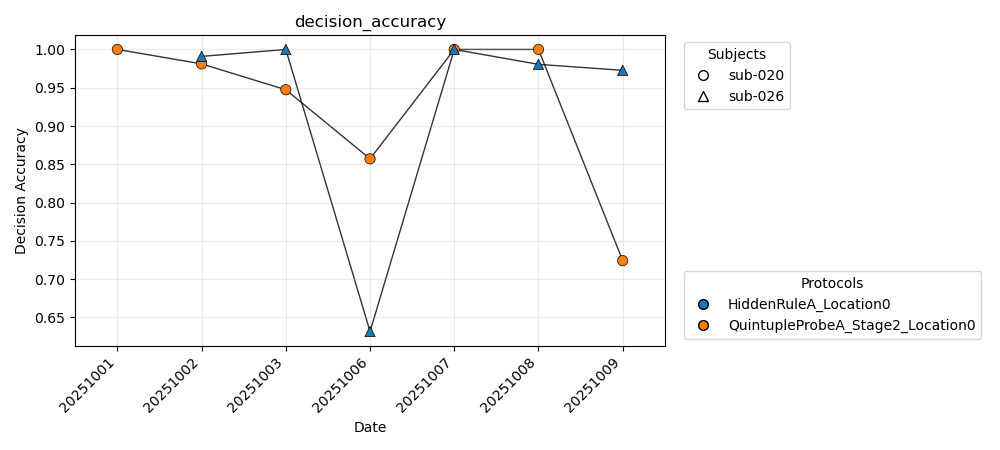

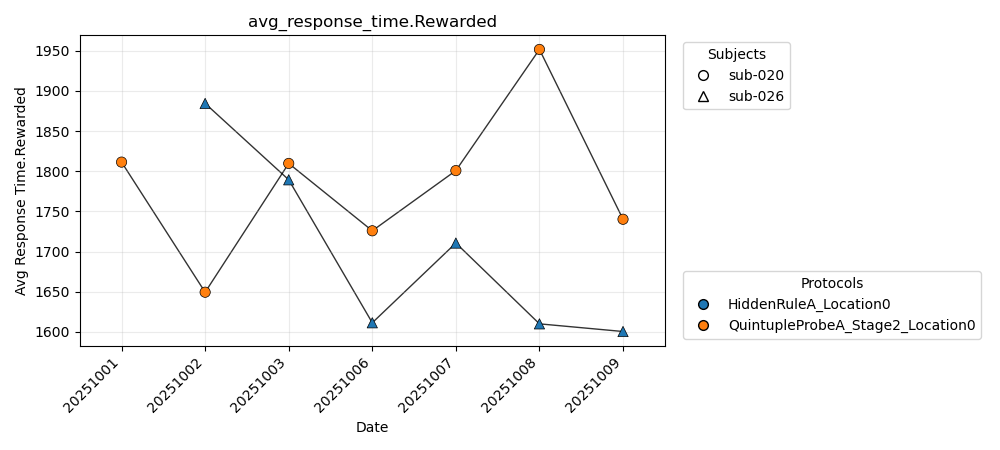

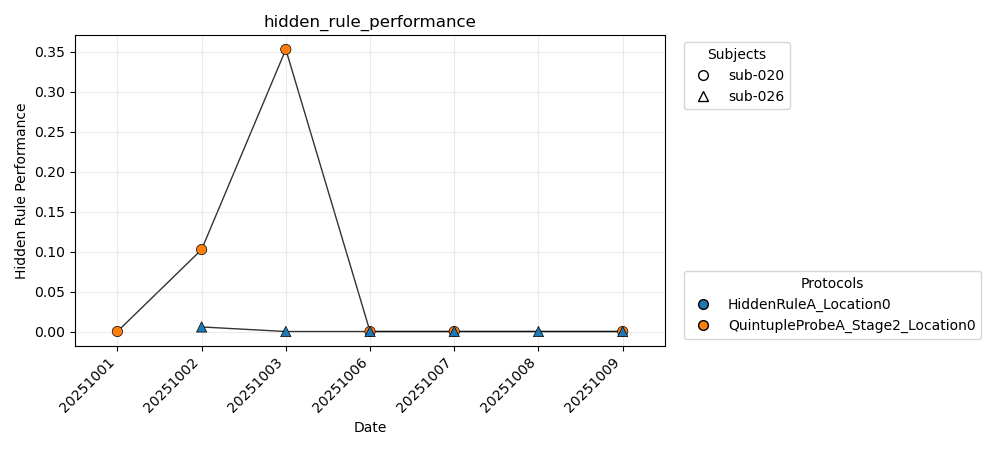

In [9]:
figs = plot_behavior_metrics(
    subjids=[20, 26],
    dates=(20251001, 20251009),
    variables=[
        "decision_accuracy",
        "avg_response_time.Rewarded", 
        "hidden_rule_performance"
    ],
    protocol_filter=None,
    compute_if_missing=False, 
    verbose=True
)

In [17]:
# Run all behavioral metrics. Can be run on one or multiple subjects and dates ([...] for multiple subject, or None for all subjects). Specify protocol to filter sessions (None for all protocols).
all_metrics = batch_run_all_metrics_with_merge(subjids=None, dates=[20250901])#, 20250902, 20250903, 20250904, 20250905, 20250906, 20250907, 20250908, 20250909, 20250910, 20250911, 20250912, 20250913, 20250914, 20250915, 20250916, 20250917, 20250918, 20250919, 20250920, 20250921, 20250922, 20250923, 20250924, 20250925, 20250926, 20250927, 20250928, 20250929, 20250930, 20251001, 20251002, 20251003, 20251004, 20251005, 20251006, 20251007, 20251008, 20251009, 20251010], protocol=None)

Found 6 subject directories.
Failed for subjid=020, date=20250901: [Errno 30] Read-only file system: '/ceph'
Failed for subjid=026, date=20250901: [Errno 30] Read-only file system: '/ceph'
Failed for subjid=025, date=20250901: [Errno 30] Read-only file system: '/ceph'
Failed for subjid=034, date=20250901: [Errno 30] Read-only file system: '/ceph'
Failed for subjid=036, date=20250901: [Errno 30] Read-only file system: '/ceph'
Failed for subjid=032, date=20250901: [Errno 30] Read-only file system: '/ceph'


In [3]:
results = load_session_results(26, 20250915)

In [4]:
metrics = run_all_metrics(results)


--- Decision Accuracy ---
Decision Accuracy: 132/138 = 0.957

--- Premature Response Rate ---
Premature Response Rate: 51/54 = 0.944

--- Response-Contingent False Alarm Rate ---
Response-Contingent False Alarm Rate: 51/189 = 0.270

--- Global False Alarm Rate ---
Global False Alarm Rate: 51/196 = 0.260

--- FA Odor Bias ---
FA Odor Bias for FA Time In:
OdorA: 1/2 FA, Bias: 1.421
OdorB: 2/2 FA, Bias: 2.842
OdorC: 4/13 FA, Bias: 0.874
OdorD: 0/7 FA, Bias: 0.000
OdorE: 4/8 FA, Bias: 1.421
OdorF: 4/13 FA, Bias: 0.874
OdorG: 4/9 FA, Bias: 1.263

--- FA Position Bias ---
FA Position Bias for FA Time In:
Position 1: 1/5 FA, Bias: 0.568
Position 2: 4/18 FA, Bias: 0.632
Position 3: 4/14 FA, Bias: 0.812
Position 4: 7/13 FA, Bias: 1.530
Position 5: 3/4 FA, Bias: 2.132

--- Sequence Completion Rate ---
Sequence Completion Rate: 142/196 = 0.724

--- Odor Abortion Rate ---
OdorA: 2/70 abortions, Rate: 0.029
OdorB: 2/81 abortions, Rate: 0.025
OdorC: 13/131 abortions, Rate: 0.099
OdorD: 7/124 aborti

In [5]:
da = decision_accuracy(results)

Decision Accuracy: 132/138 = 0.957


In [6]:
pre_res_rate = premature_response_rate(results)

Premature Response Rate: 51/54 = 0.944


In [ ]:
res_cont_FA = response_contingent_FA_rate(results)

In [ ]:
glob_FA_rate_results = global_FA_rate(results)

In [8]:
fa_odor_bias_result = FA_odor_bias(results)

FA Odor Bias for FA Time In:
OdorA: 1/2 FA, Bias: 1.421
OdorB: 2/2 FA, Bias: 2.842
OdorC: 4/13 FA, Bias: 0.874
OdorD: 0/7 FA, Bias: 0.000
OdorE: 4/8 FA, Bias: 1.421
OdorF: 4/13 FA, Bias: 0.874
OdorG: 4/9 FA, Bias: 1.263


In [11]:
fa_position_bias = FA_position_bias(results)

In [ ]:
completed_seqs = sequence_completion_rate(results)

In [ ]:
odor_abortion_rates_result = odorx_abortion_rate(results)

In [ ]:
hidden_rule_performance_results = hidden_rule_performance(results)


In [ ]:
hidden_rule_detection_results = hidden_rule_detection_rate(results)

In [ ]:
choice_timeouts = choice_timeout_rate(results)

In [ ]:
avg_sampling_results = avg_sampling_time_odor_x(results)

In [ ]:
avg_sampling_completed_seq_results = avg_sampling_time_completed_sequence(results)

In [ ]:
avg_sampling_aborted_sequence_result = avg_sampling_time_aborted_sequence(results)
# Note: different from the one calculated in the merge summary, as this does not drop poke times < minimum_sampling_time_ms

In [ ]:
avg_sampling_initiation = avg_sampling_time_initiation_abortion(results)

In [ ]:
abortion_rate_results = abortion_rate_positionX(results)


In [7]:
avg_response_time_results = avg_response_time(results)


Rewarded: 1482.9 ms (n=132)
Unrewarded: 1602.9 ms (n=6)
Reward Timeout: 11426.0 ms (n=4)
Average Response Time (Rewarded + Unrewarded): 1488.1 ms (n=138)


In [ ]:
FA_response_time_results = FA_avg_response_times(results)


In [ ]:
resposne_rate_results = response_rate(results)

In [ ]:
stop_preference = manual_vs_auto_stop_preference(results)

In [ ]:
non_initiated_FA_rate_results = non_initiated_FA_rate(results)

In [ ]:
non_initiation_odor_bias_results = non_initiation_odor_bias(results)

In [ ]:
odor_init_bias_results = odor_initiation_bias(results)

In [ ]:
fa_abortion_stats_results = fa_abortion_stats(results)